In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df1 = pd.read_csv('D:\ML projects\Side Project\epl_clubs_info_2022-23.csv')
df2 = pd.read_csv('D:\ML projects\Side Project\epl_results_2022-23.csv')

In [81]:
team_df = df2.dropna()

In [82]:
team_names = list(set(team_df['HomeTeam'].unique()))
team_names

['Nottingham',
 'Tottenham',
 'Leeds',
 'Brighton',
 'Man United',
 'Arsenal',
 'Brentford',
 'Chelsea',
 'Fulham',
 'Bournemouth',
 'Southampton',
 'West Ham',
 'Crystal Palace',
 'Everton',
 'Leicester',
 'Wolves',
 'Aston Villa',
 'Newcastle',
 'Man City',
 'Liverpool']

In [83]:
team_df

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,D,...,6,2,11,12,9,3,1,3,0,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,A,...,2,7,7,5,12,3,3,0,0,0
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,H,...,4,3,8,10,3,5,1,1,0,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,D,...,8,3,14,10,5,4,1,2,0,0


In [84]:
goals_by_home_team = team_df.groupby('HomeTeam')['FTHG'].sum()
goals_by_away_team = team_df.groupby('AwayTeam')['FTAG'].sum()


In [85]:
goals_by_away_team

AwayTeam
Arsenal           35
Aston Villa       18
Bournemouth       17
Brentford         23
Brighton          35
Chelsea           18
Crystal Palace    19
Everton           18
Fulham            24
Leeds             22
Leicester         28
Liverpool         29
Man City          34
Man United        22
Newcastle         32
Nottingham        11
Southampton       17
Tottenham         33
West Ham          16
Wolves            12
Name: FTAG, dtype: int64

In [86]:
team_df

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,D,...,6,2,11,12,9,3,1,3,0,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,A,...,2,7,7,5,12,3,3,0,0,0
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,H,...,4,3,8,10,3,5,1,1,0,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,D,...,8,3,14,10,5,4,1,2,0,0


In [87]:
total_goals = goals_by_away_team + goals_by_home_team

In [88]:
total_goals

AwayTeam
Arsenal           88
Aston Villa       51
Bournemouth       37
Brentford         58
Brighton          72
Chelsea           38
Crystal Palace    40
Everton           34
Fulham            55
Leeds             48
Leicester         51
Liverpool         75
Man City          94
Man United        58
Newcastle         68
Nottingham        38
Southampton       36
Tottenham         70
West Ham          42
Wolves            31
dtype: int64

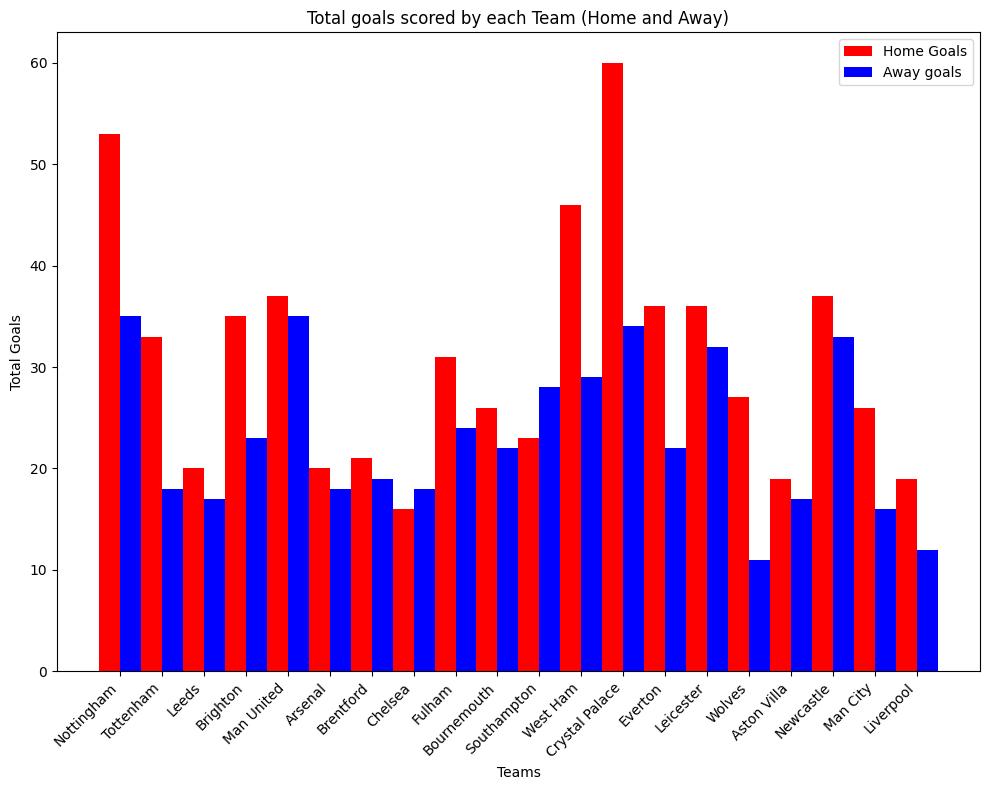

In [89]:
specifications = ("home team","Away team")
Bar_width = 0.5
x = np.arange(len(team_names))

plt.figure(figsize=(10,8))
plt.bar(x-Bar_width/2,goals_by_home_team,label='Home Goals',width = Bar_width, color = 'red')
plt.bar(x+Bar_width/2,goals_by_away_team,label = 'Away goals', width = Bar_width, color='blue')

plt.xlabel('Teams')
plt.ylabel('Total Goals')
plt.title('Total goals scored by each Team (Home and Away)')

plt.xticks(x, team_names,rotation=45,ha='right')
plt.legend()
plt.tight_layout()

plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [92]:
team_df['goal_diff'] = team_df['FTHG']-team_df['FTAG']